<h1>How does aggregate user rating varies with number of votes</h1>

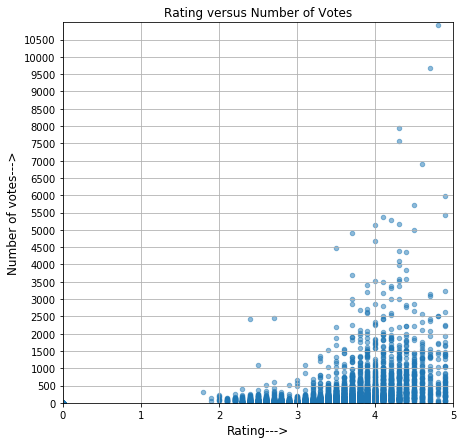

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=pd.read_csv('datasets/zomato.csv', encoding='ISO-8859-1')
df=data.copy()
#i didn't do anything much. just plotted the graph
plt.figure(figsize=(7, 7))
plt.scatter(df['Aggregate rating'], df['Votes'], s=20, alpha=0.5)
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of votes--->', size=12)
plt.title('Rating versus Number of Votes')
plt.grid()
plt.show()

Clearly as the number of votes increases the chances of getting higher ratings also increases. It is clear from the graph that any restaurants with more than 5000 votes get ratings between 4 and 5. when the voes are less than 2000, there is a diversity of ratings, which varies from 2 to 5. so for a restaurant to have a probability of getting higher aggregate rating, it should have more than 5000 votes. Also there are many restaurants having votes between between 1000 and 2000 with very good ratings, that is between 4 and 5.

<h1>How does aggregate user rating varies with number of cuisines served</h1>

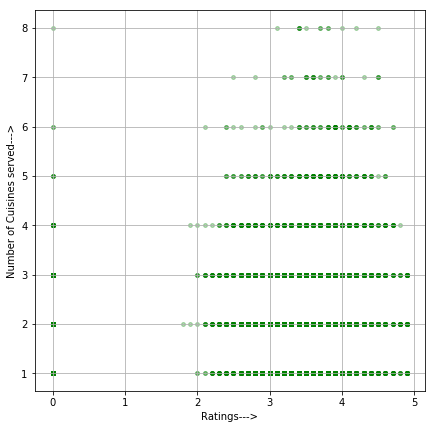

number of cuisines served=  3 , number of restaurants serving given number of cuisines=  1840
number of cuisines served=  1 , number of restaurants serving given number of cuisines=  3394
number of cuisines served=  4 , number of restaurants serving given number of cuisines=  584
number of cuisines served=  2 , number of restaurants serving given number of cuisines=  3444
number of cuisines served=  5 , number of restaurants serving given number of cuisines=  164
number of cuisines served=  6 , number of restaurants serving given number of cuisines=  74
number of cuisines served=  7 , number of restaurants serving given number of cuisines=  28
number of cuisines served=  8 , number of restaurants serving given number of cuisines=  14


In [4]:
df=df.loc[df.Cuisines.notnull()]
cuisines=[len(i.split(',')) for i in df.Cuisines]
rating=[i for i in df['Aggregate rating']]
plt.figure(figsize=(7, 7))
plt.scatter(rating, cuisines, c='green', s=15, alpha=0.3)
plt.xlabel('Ratings--->')
plt.ylabel('Number of Cuisines served--->')
plt.grid()
plt.show()
dic=dict()
for i in cuisines:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
for i in dic.keys():
    print("number of cuisines served= ", i, ", number of restaurants serving given number of cuisines= ", dic[i])

From the graph itself, it is clear that when the number of cuisines provided increases from 3 to 8, generally the rating seems to converge between 3 and 4. restaurants providing more number of cuisines are not much likely to get higher ratings, specially when the number of cuisines provided exceeds 6. while if the restaurants provide less number of cuisines, for example 1 or 2 cuisines, they are more likely to get higher ratings. Infact many restaurants in india are providing 2 cuisines. there is a very less number of restaurants providing 8 cuisines. it seems like when a restaurant provides too many cuisines, its focus on the quality of food offered diverges. while restaurants providing less cuisines focus on the quality of food to get good aggregate ratings.

<h1>How does aggregate user rating varies with average cost of the restaurant</h1>

<Figure size 504x504 with 0 Axes>

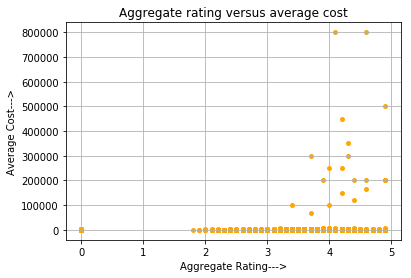

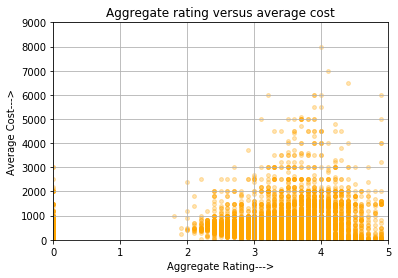

In [5]:
df=data.copy()
plt.figure(figsize=(7, 7))


plt.subplots(0, 1)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange')
plt.grid()
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()


plt.subplots(0, 2)
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange', alpha=0.3)
plt.grid()
plt.axis([0, 5, 0, 9000])
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()

In the first subplot we can see that when the average cost goes higher than 1 lakh the rating is generally between 4 and 5, and ofcourse it sholud be like that only, because when the average cost is too high itself, the food quality should also be at its peak.This subplot dosen't give us much details about the variation of rating with the average cost. The second subplot is made by narrowing the range of average cost for two.As the average cost goes in between 2000, to 6000, it seems like the food is not worth the money because in that case the average rating is generally between 3 and 4. whereas when the average cost is between 1000 to 2000, the rating varies from 3 to 4.5 mostly. But for the higher price ranges the rating is between 3 and 4.

<h1>How does the aggregate user rating varies with restaurants serving some specific cuisines.</h1>

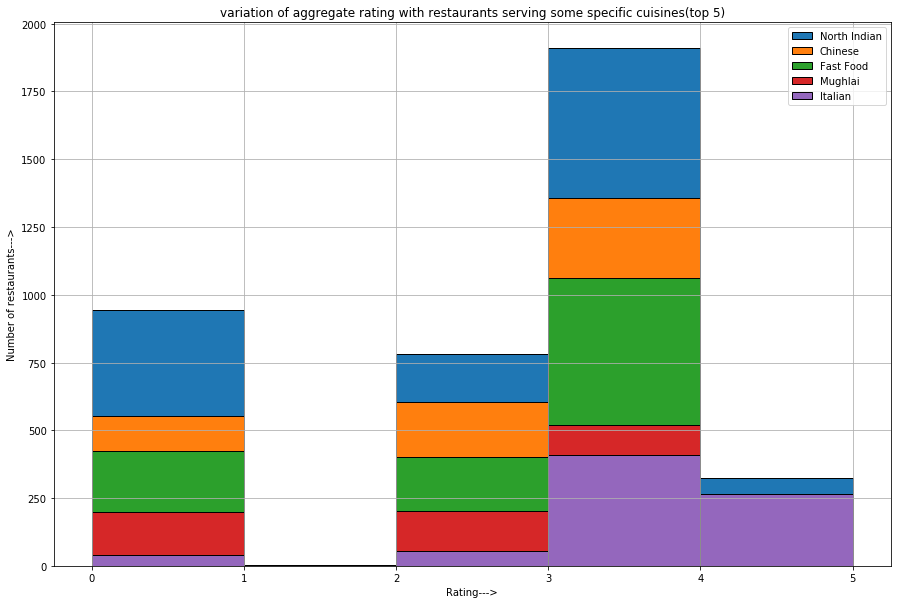

In [6]:
df=data.copy()
df=df.loc[df.Cuisines.notnull()]
cuisines=[]
for i in df.Cuisines:
    for j in i.split(','):
        cuisines.append(j)
dic=dict()
for i in cuisines:
    if i.strip() in dic.keys():
        dic[i.strip()]+=1
    else:
        dic[i.strip()]=1
cus=np.array([i for i in dic.keys()])
freq=np.array([i for i in dic.values()])

cus=cus[np.argsort(freq)][::-1]
freq=freq[np.argsort(freq)][::-1]
popular_cuisines=cus[:5]
plt.figure(figsize=(15, 10))
for i in popular_cuisines:
    rating=[]
    for j, k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating--->')
    plt.ylabel('Number of restaurants--->')
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)')
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()

From the above histrogram plot, it is clear that North indian cuisinie is the best rated among all the cuisinies in all the aggregate ranges. After it comes the chinese cuisinie, it is rated between 3 to 4 maximum number of times. Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times.after these comes mughlai and italian cuisines.it seems like people like the italian cuisinie very much because it has a considerable rating between 3 to 4 and 4 to 5 also.

<h1>Weighted Restaurant Rating</h1>

In [7]:
df=data.copy()
np_rating=np.array([i for i in df['Aggregate rating']])
np_votes=np.array([i for i in df['Votes']])
np_locality=np.array([i for i in df['Locality']])
dic=dict()
for i in set(np_locality):
    if sum(np_votes[np.argwhere(np_locality==i)])[0]!=0:
        dic[i]=sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0]/sum(np_votes[np.argwhere(np_locality==i)])[0]
        #here i have just applied the complete formula to calculate Weighted restaurant rating  in each locality
        #here i is the locality name and this leanthy term is the formula for calculating  WRR.
        #sum((np_votes*np_rating)[np.argwhere(np_locality==i)])[0] here [0] at the last is used because the result i will get from sum((np_votes*np_rating)[np.argwhere(np_locality==i)]) is an array with one number. thats why i have indexed it to get that number.
        #same is the case with sum(np_votes[np.argwhere(np_locality==i)])[0]
np_local=np.array([i for i in dic.keys()])#numpy array of locality
np_wrr=np.array([i for i in dic.values()])#weighted restaurant rating
np_local=np_local[np.argsort(np_wrr)][::-1]#arranged in descending order
np_wrr=np.sort(np_wrr)[::-1]#arranged in desceding order
for i in range(len(np_wrr)):
    print(np_local[i], "----->", np_wrr[i])

Nassima Royal Hotel, Trade Centre Area -----> 4.9
Penjaringan -----> 4.9
DIFC -----> 4.9
Setor De Clubes Esportivos Sul -----> 4.9
New Tampa -----> 4.9
Venetian Village, Al Maqtaa -----> 4.9
Fort Street -----> 4.9
Windermere -----> 4.9
Lexington Street, Soho -----> 4.9
Taman Impian Jaya Ancol, Ancol -----> 4.9
Marshalltown -----> 4.9
Sofitel Philippine Plaza Manila, Pasay City -----> 4.9
West Park -----> 4.9
Cengkareng -----> 4.9
Caddebostan -----> 4.9
Gíçvea -----> 4.9
Pondok Aren -----> 4.9
Old Dutch Hospital, Fort -----> 4.9
Beak Street, Soho -----> 4.9
Deira City Centre Area -----> 4.9
The Milk District -----> 4.9
Hotel Clarks Amer, Malviya Nagar -----> 4.9
Bishopsgate, City Of London -----> 4.9
Barwa Towers, Al Sadd -----> 4.9
Paia -----> 4.9
City and Suburban -----> 4.9
Kenwood -----> 4.9
Aminabad -----> 4.9
Bebek -----> 4.9
Friends Colony -----> 4.886916367367881
Powai -----> 4.841868613138686
Kirlampudi Layout -----> 4.820161290322581
Sanford -----> 4.8
Galeria River, Copacaban

Clive -----> 4.054685777287761
Wellington Central -----> 4.051696606786427
Najda -----> 4.049769585253456
Lawrence Road -----> 4.0476190476190474
Sangam Courtyard, RK Puram -----> 4.044468198824157
New Town -----> 4.04290780141844
The Claridges, Aurangzeb Road -----> 4.04137334102712
Lodhi Road -----> 4.033866103739445
Epicuria Food Mall, Nehru Place -----> 4.033628674989932
Kacheripady -----> 4.0317934782608695
Athwa -----> 4.030434782608696
Tagore Garden -----> 4.027184466019417
Khan Market -----> 4.0271069734762
Uzan Bazaar -----> 4.025669099756691
DB City, Maharana Pratap Nagar -----> 4.024686192468619
DLF Place Mall, Saket -----> 4.0193074324324325
New Palasia -----> 4.0156414762741655
BMC Bhawani Mall, Sahid Nagar -----> 4.013473053892215
TT Nagar -----> 4.011388888888889
Kollupitiya, Colombo 03 -----> 4.005116279069767
Mall Road -----> 4.003191489361702
Tebet -----> 4.0
Mall of Qatar, Al Gharafa -----> 4.0
Dalma Mall, Mussafah Sanaiya -----> 4.0
Moda -----> 4.0
Rushikonda ----->

Anand Wali Goan -----> 3.652054794520548
Le Meridien Gurgaon, MG Road -----> 3.6516129032258067
Gokulam -----> 3.650747986191025
Paharganj -----> 3.6443824145150034
Adchini -----> 3.64275641025641
DLF Galleria, DLF Phase 4 -----> 3.6424251870324196
Asa Norte -----> 3.6405405405405404
Maharani Peta -----> 3.640425531914894
The Park, Connaught Place -----> 3.6387379491673966
Uday Park -----> 3.6373983739837397
Vesu -----> 3.6278745644599306
Golf Course Road -----> 3.6260819053151323
DLF Cyber City -----> 3.6207091055600316
Sarojini Nagar -----> 3.6178947368421053
Daryaganj -----> 3.616440480806514
South Extension 2 -----> 3.616193853427896
Assi Ghat -----> 3.6149038461538465
Hauz Khas -----> 3.614607149337689
Marina Centre, Downtown Core -----> 3.613483146067416
The Westin Sohna Resort & Spa, Sohna Road -----> 3.601492537313433
East of Kailash -----> 3.6014667817083694
Crowne Plaza Hotel, Rohini -----> 3.600840336134454
Vyttila -----> 3.6000000000000005
Sagar Nagar -----> 3.6000000000000

Durga Puri -----> 2.9
Mayfield -----> 2.9
Sector 72 -----> 2.895273631840797
Sector 46 -----> 2.8807692307692307
District Centre, Janakpuri -----> 2.8804670912951162
Tilak Nagar -----> 2.87923076923077
Sector 47 -----> 2.878787878787879
Naraina -----> 2.876486486486487
Supertech Shopprix Mall, Sector 61 -----> 2.876074498567335
Asaf Ali Road -----> 2.8722222222222222
The India Mall, New Friends Colony -----> 2.8562628336755647
Best Western Skycity Hotel, Sector 15, Gurgaon -----> 2.8535714285714286
Sector 57 -----> 2.8406779661016945
Vyapar Kendra, Palam Vihar -----> 2.838095238095238
Sector 58 -----> 2.8342105263157897
 ILD Trade Centre Mall, Sohna Road -----> 2.8166666666666664
Charmwood Village -----> 2.8043478260869565
Cyber Greens, DLF Cyber City -----> 2.8
Jukaso It Suites, Sector 14 -----> 2.8
Alum Rock -----> 2.8
Subhash Nagar -----> 2.798095238095238
Sector 2 -----> 2.790746268656717
MGM Club, Daryaganj -----> 2.782608695652174
V3S Mall, Laxmi Nagar -----> 2.779602649006623
Se

<h1>Following are the top 10 localities with more weighted restaurant rating</h1>
<li>Marshalltown</li>
<li>Barwa Towers, Al Sadd</li>
<li>West Park</li>
<li>New Tampa</li>
<li>The Milk District</li>
<li>Taman Impian Jaya Ancol, Ancol</li>
<li>DIFC</li>
<li>City and Suburban</li>
<li>Pondok Aren</li>
<li>Cengkareng</li>